## Install Fuzzy package

In [ ]:
# pip install scikit-fuzzy

## Construct Fuzzy Set and set universe 

In [26]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl
import matplotlib.pyplot as plt
import skfuzzy.control as fuzz_ctrl
from mpl_toolkits.mplot3d import Axes3D

# Range

## range of temp. & humidity & watering
# 32 F -> 0 C, 123 F -> 50.5555556 C
x_temp_range = np.arange(5,40,1,np.float32)
x_humidity_range = np.arange(20,90,1,np.float32)
y_time_range = np.arange(0,10,1,np.float32)
##　variable and membership functions
x_temp = fuzz_ctrl.Antecedent(x_temp_range,"temp")
x_humidity= fuzz_ctrl.Antecedent(x_humidity_range,"humidity")
y_time = fuzz_ctrl.Consequent(y_time_range,"time")

## Membership functions

In [27]:
# Revised Setup
temp_cold = fuzz.trapmf(x_temp_range,[5,5,12,15])

temp_cool = fuzz.gaussmf(x_temp_range, 20, 3)

temp_normal = fuzz.gaussmf(x_temp_range, 23, 3)
temp_warm = fuzz.gaussmf(x_temp_range,28, 3)

temp_hot = fuzz.trapmf(x_temp_range,[30,33,40,40])

humidity_dry = fuzz.trapmf(x_humidity_range,[20,20,30,40])
humidity_moist = fuzz.trapmf(x_humidity_range,[30,40,60,70])
humidity_wet = fuzz.trapmf(x_humidity_range,[60,70,90,90])

time_short = fuzz.trapmf(y_time_range,[0,0,2,4])
time_medium = fuzz.trapmf(y_time_range,[2,4,7,8])
time_long = fuzz.trapmf(y_time_range,[7,8,10,10])


x_temp["cold"] = temp_cold
x_temp["cool"] = temp_cool
x_temp["normal"] = temp_normal
x_temp["warm"] = temp_warm
x_temp["hot"] = temp_hot

x_humidity["dry"] = humidity_dry
x_humidity["moist"] = humidity_moist
x_humidity["wet"] = humidity_wet

y_time["short"] = time_short
y_time["medium"] = time_medium
y_time["long"] = time_long



## Visualization

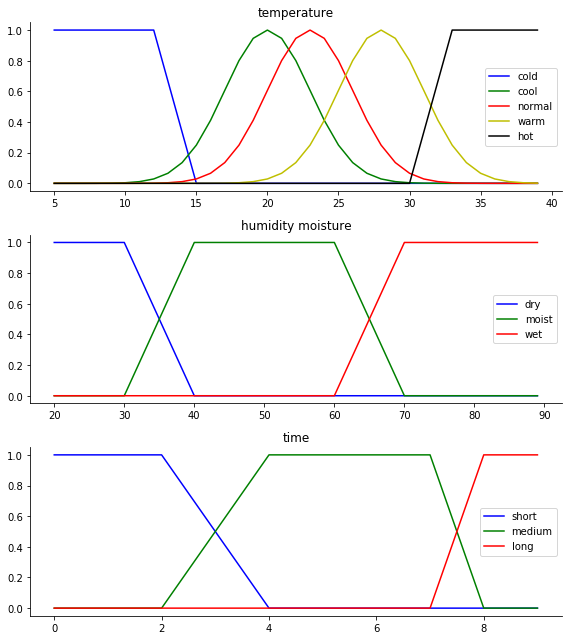

In [28]:
# Visualize these universes and membership functions
fig,(figure1,figure2,figure3)=plt.subplots(nrows=3,figsize=(8,9))

figure1.plot(x_temp_range, temp_cold ,'b',linewidth=1.5,label='cold')
figure1.plot(x_temp_range, temp_cool,'g',linewidth=1.5,label='cool')
figure1.plot(x_temp_range, temp_normal,'r',linewidth=1.5,label='normal')
figure1.plot(x_temp_range, temp_warm,'y',linewidth=1.5,label='warm')
figure1.plot(x_temp_range, temp_hot,'k',linewidth=1.5,label='hot')
figure1.set_title('temperature')
figure1.legend()

figure2.plot(x_humidity_range, humidity_dry,'b',linewidth=1.5,label='dry')
figure2.plot(x_humidity_range, humidity_moist,'g',linewidth=1.5,label='moist')
figure2.plot(x_humidity_range, humidity_wet,'r',linewidth=1.5,label='wet')
figure2.set_title('humidity moisture')
figure2.legend()

figure3.plot(y_time_range, time_short,'b',linewidth=1.5,label='short')
figure3.plot(y_time_range, time_medium,'g',linewidth=1.5,label='medium')
figure3.plot(y_time_range, time_long,'r',linewidth=1.5,label='long')
figure3.set_title('time')
figure3.legend()

# plot 2d figures
for fi in (figure1,figure2,figure3):
  fi.spines['top'].set_visible(False)
  fi.spines['right'].set_visible(False)
  fi.get_xaxis().tick_bottom()
  fi.get_yaxis().tick_left()

plt.tight_layout()



## Rules

In [29]:
# Revised Setup

# Centroid Defuzzification
y_time.defuzzify_method = "centroid"
# Rules 
rule_long=fuzz_ctrl.Rule(antecedent=((x_temp["hot"]&x_humidity["dry"])|(x_temp["hot"]&x_humidity["moist"])|(x_temp["hot"]&x_humidity["wet"])|(x_temp["warm"]&x_humidity["wet"])),consequent=y_time["long"],label="long")
rule_med=fuzz_ctrl.Rule(antecedent=((x_temp["warm"]&x_humidity["dry"])|(x_temp["warm"]&x_humidity["moist"])|(x_temp["normal"]&x_humidity["moist"])|(x_temp["normal"]&x_humidity["wet"])|(x_temp["cool"]&x_humidity["wet"])),consequent = y_time["medium"],label="medium")
rule_short=fuzz_ctrl.Rule(antecedent=((x_temp["cool"]&x_humidity["dry"])|(x_temp["cool"]&x_humidity["moist"])|(x_temp["cold"]&x_humidity["dry"])|(x_temp["cold"]&x_humidity["moist"])|(x_temp["cold"]&x_humidity["wet"])),consequent=y_time["short"],label="short")


system=fuzz_ctrl.ControlSystem(rules=[rule_long,rule_med,rule_short])
sys_sim=fuzz_ctrl.ControlSystemSimulation(system)

## User Input

In [37]:
input_temp=input("Input Temp(℃): ")
input_humidity=input("Input Humidity(%): ")

sys_sim.input["temp"]=int(input_temp)
sys_sim.input["humidity"]=int(input_humidity)

# System Compute
sys_sim.compute()
out_y=sys_sim.output["time"]
print(out_y)

4.569332349757592


# 3D figure


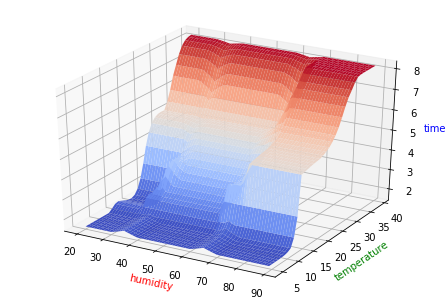

In [24]:
from mpl_toolkits.mplot3d import Axes3D
def funz(x,y):
  sys_sim.input["temp"] = y
  sys_sim.input["humidity"] = x 
  sys_sim.compute()
  z=sys_sim.output["time"]
  return z

fig1=plt.figure()
ax=Axes3D(fig1)

X,Y=np.meshgrid(x_humidity_range,x_temp_range)
Z=funz(X,Y)
ax.plot_surface(X, Y, Z, rstride=1,cstride=1,cmap=plt.cm.coolwarm)
ax.set_xlabel('humidity',color='r')
ax.set_ylabel('temperature',color='g')
ax.set_zlabel('time',color='b')
plt.show()